In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Параметри

*   ### Відомі координати розташування кількох передавачів, які зафіксували невідоме судно, а також відповідні кути напряму на це судно
*   ### фактичне положення судна


In [ ]:
coord = [(8, 6, 42), (-4, 5, 158), (1, -3, 248), (-1, -2, 38)]
fact_point = (3, 2)

## Знайдемо теоретичне положення судна


## Система рівнянь


In [ ]:
b = []
k = []
alpha_0 = []
alpha_1 = []
for turple in coord:
  k_new = math.tan(math.radians(turple[2]))
  b_new = turple[1] - turple[0]*k_new
  k.append(k_new)
  b.append(b_new)
  alpha_1.append(1)
  if k_new <= 0:
    k_new = -1*k_new
    alpha_0.append(k_new)
  else:
    alpha_0.append(-k_new)
    k_new = -1*k_new

for i in range(len(coord)):
  print(f"{k[i]} x + y = {b[i]}")

0.9004040442978399 x + y = -1.2032323543827195
-0.40402622583515707 x + y = 3.383895096659372
2.4750868534162938 x + y = -5.475086853416293
0.7812856265067174 x + y = -1.2187143734932826


## Система нормальних рівнянь

In [ ]:
alpha_00 = alpha_01 = alpha_11  = f_alpha_0_sum = f_alpha_1_sum = 0

for i in range(0, len(alpha_0)):
  alpha_00 += math.pow(alpha_0[i], 2)
  alpha_01 += alpha_0[i]*alpha_1[i]
  alpha_11  += math.pow(alpha_1[i], 2)
  f_alpha_0_sum += b[i]*alpha_0[i]
  f_alpha_1_sum += b[i]*alpha_1[i]

print(f"{alpha_00}   x + {alpha_01} y = {f_alpha_0_sum}")
print(f"{alpha_01} x + {alpha_11 } y = {f_alpha_1_sum}")

7.710426796290672   x + -3.7527502983856937 y = 16.954057157672082
-3.7527502983856937 x + 4.0 y = -4.513138484632924


## Точка приблизного положення

In [ ]:
y_appr = (f_alpha_1_sum - f_alpha_0_sum*(alpha_01/alpha_00))/(alpha_11  - (math.pow(alpha_01, 2)/alpha_00))
x_appr = (f_alpha_0_sum - alpha_01*y_appr)/alpha_00
print(f"x = {x_appr}, y = {y_appr}")

x = 3.036031093379275, y = 1.7200820267385988


## Відхилення розвʼязку

In [ ]:
deviation = 0
for i in range(0, len(b)): deviation += math.pow(b[i] - (x_appr*alpha_0[i] + y_appr*alpha_1[i]), 2)
print(deviation)

0.65027860241724


## Геометрична інтерпретація




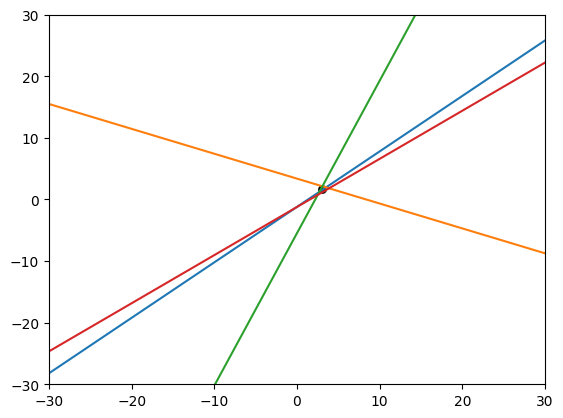

In [ ]:
point = (x_appr, y_appr)
x = np.linspace(-30, 30, 100)
for i in range(0, len(coord)):
  k = math.tan(math.radians(coord[i][2]))
  y = k*x + b[i]
  plt.plot(x, y)
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.scatter(point[0],  point[1], c = 'black', s = 40, linewidth = 0)
plt.show()

## Відстань між фактичним і теоретичним положеннями судна

In [ ]:
distance = math.sqrt(math.pow(fact_point[0] - point[0], 2) + math.pow(fact_point[1] - point[1], 2))
print(distance)

0.2822274108673298


## Геометрична інтерпретація

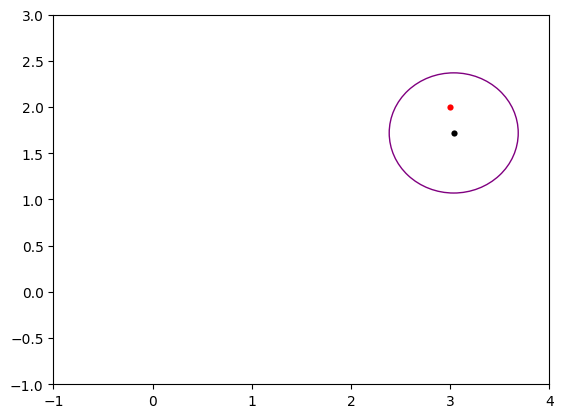

In [ ]:
plt.xlim(-1, 4)
plt.ylim(-1, 3)
plt.scatter(point[0],  point[1], c = 'black', s = 20, linewidth = 0) # приблизне
plt.scatter(fact_point[0],  fact_point[1], c = 'red', s = 20, linewidth = 0) # фактичне
circle = plt.Circle(point, deviation, color='purple', fill = False )
plt.gca().add_patch(circle)
plt.show()